dN/dt = rn(1-N/K)

Para valores de K, r e N(t = 0) = N0

Plote N(t)

In [ ]:
import numpy as np

In [ ]:
def solve_logistic(r, n, delta_t, tf, k):
    li = [n]
    p = int(tf/delta_t)
    for i in range(1,p):
      li.append(n + delta_t * r * n * (1 - (n/k)))
      n = li[i]
    return np.array(li)

test = solve_logistic(3.1, 5, 0.1, 10, 50)


In [ ]:
from matplotlib import pyplot as pt
pt.plot(test)


Projeto


o espaço tem que estar dentro do loop de tempo

In [1]:
import numpy as np
import scipy.stats as st
from tqdm import tqdm
import random
from matplotlib import pyplot as pt


In [ ]:

xb = 10
xmax = 30
p = 0.1
Db = 1E-2
deltat = 0.1
tmax = 100
rb = 2.0
kb = 100
xq = 20
Dq = 2.5E-2
chi = 1E-3 #quanto afeta
minimum = 0.5
lamb = 0.05
ponto_inicial = 25
quimico = 8
m = 0.05

imagem = tw(xb, xq, xmax, Db, Dq, tmax, p, rb, chi, lamb, deltat, ponto_inicial, quimico, m)


array([10])

In [144]:
# def tw(xb, xq, xmax, Db, Dq, tmax, p, rb, chi, lamb, deltat, ponto_inicial, quimico):
#   inicioq = np.zeros(xmax)
#   iniciob = [xb + np.random.normal(scale = 2) for i in range(xmax)]

#   #listas de listas
#   simulacb = [iniciob]
#   simulacq = [inicioq]

#   for i in range(tmax):
#     rho = simulacb[-1] #lista de rho's
#     s = simulacq[-1] #lista de concentrações de químico
    
#     listab = [] #lista para iterações pelo espaço pra fazer o append depois :)
#     listaq = [] #lista para iterações pelo espaço do químico

#     for j in range(xmax):
#       if j == 0:

#         bac = rho[j+1]
#         qui = s[j+1]

#         listab.append(bac)
#         listaq.append(qui)

#       elif j == xmax-1:
      
#         bac = rho[j-1]
#         qui = s[j-1]

#         listab.append(bac)
#         listaq.append(qui)

#       else:
        
#         diffusion = Db * ((rho[j+1]-2*rho[j]+rho[j-1])/p**2) #difusão das bactérias pura
#         growth = rb * rho[j] - rb/kb * rho[j]**2 #crescimento
#         quimio = chi * ((((rho[j+1]-rho[j-1])-(s[j+1]-s[j-1]))/p*2) + rho[j] * ((s[j+1]-2*s[j]+s[j-1])/p**2)) #quimiotaxia


#         bac = rho[j] + deltat * (diffusion + growth + quimio) #Dinâmica da bactéria
        
#         qui = s[j] + deltat * (Dq * ((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j])) #Difusão do químico - valor da degradação expontânea
#         listab.append(bac)



#         if j == ponto_inicial:
#           qui = xq + s[j] + deltat * Dq * (((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j]))
          
#         if i > quimico:
#           listaq.append(qui)
#         else:
#           listaq.append(0)

#     simulacb.append(listab)
#     simulacq.append(listaq)
  
#   return simulacb, simulacq



In [151]:
def tw(xb, xq, xmax, Db, Dq, tmax, p, rb, chi, lamb, deltat, ponto_inicial, quimico, m):
  inicioq = np.zeros(xmax)
  iniciob = [xb + np.random.normal(scale = 2) for i in range(xmax)]

  #listas de listas
  simulacb = [iniciob]
  simulacq = [inicioq]

  for i in range(tmax):
    rho = simulacb[-1] #lista de rho's
    s = simulacq[-1] #lista de concentrações de químico
    
    listab = [] #lista para iterações pelo espaço pra fazer o append depois :)
    listaq = [] #lista para iterações pelo espaço do químico

    for j in range(xmax):
      if j == 0:

        bac = rho[j+1]
        qui = s[j+1]

        listab.append(bac)
        listaq.append(qui)

      elif j == xmax-1:
      
        bac = rho[j-1]
        qui = s[j-1]

        listab.append(bac)
        listaq.append(qui)

      else:
        
        morte = m * s[j] * rho[j]
        
        diffusion = Db * ((rho[j+1]-2*rho[j]+rho[j-1])/p**2) #difusão das bactérias pura
        growth = rb * rho[j] - rb/kb * rho[j]**2 #crescimento
        quimio = chi * ((((rho[j+1]-rho[j-1])-(s[j+1]-s[j-1]))/p*2) + rho[j] * ((s[j+1]-2*s[j]+s[j-1])/p**2)) - morte #quimiotaxia


        bac = rho[j] + deltat * (diffusion + growth + quimio) #Dinâmica da bactéria
        
        qui = s[j] + deltat * (Dq * ((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j])) #Difusão do químico - valor da degradação expontânea
        listab.append(bac)



        if j == ponto_inicial:
          qui = xq + s[j] + deltat * Dq * (((s[j+1]-2*s[j]+s[j-1])/p**2) - (lamb * s[j]))
          
        if i > quimico:
          listaq.append(qui)
        else:
          listaq.append(0)

    simulacb.append(listab)
    simulacq.append(listaq)
  
  return simulacb, simulacq


In [162]:

xb = 10
xmax = 30
p = 0.1
Db = 1E-2
deltat = 0.1
tmax = 100
rb = 2.0
kb = 100
xq = 20
Dq = 2.5E-2
chi = 1E-3 #quanto afeta
minimum = 0.5
lamb = 0.05
ponto_inicial = 25
quimico = 8
m = 0.05


imagem = tw(xb, xq, xmax, Db, Dq, tmax, p, rb, chi, lamb, deltat, ponto_inicial, quimico, m)


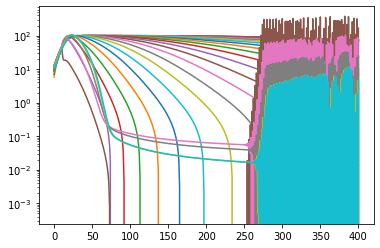

In [160]:
pt.plot(np.array(imagem)[0,:])


pt.yscale("log")
# pt.axvline(25, ls = '--', color = 'black')

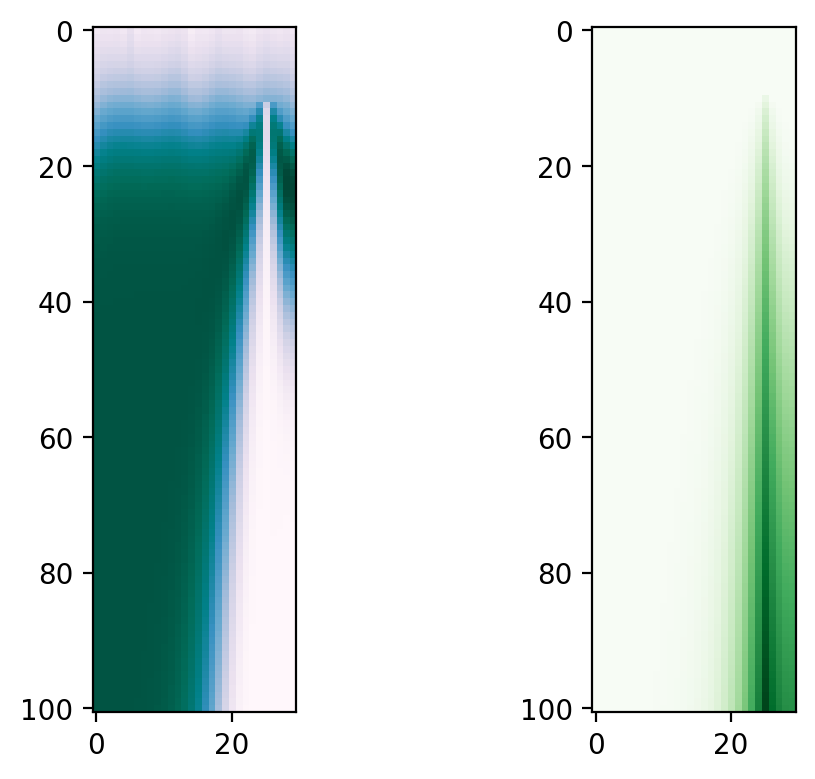

In [163]:
from matplotlib import pyplot as pt
import plotly.express as px

fig, ax = pt.subplots(1, 2, dpi = 200)
img = ax[0].imshow(imagem[0], cmap = 'PuBuGn')
#pt.colorbar(img, ax = ax[0])

img2 = ax[1].imshow(imagem[1], cmap = 'Greens')

#fig.colorbar(img, ax = ax[0])
#fig.colorbar(img2, ax = ax[1])

pt.tight_layout()
pt.show()


In [25]:
imagem[1][10:20]

[[0.0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0],
 [0.0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,
  0,
  0.0,